<a href="https://colab.research.google.com/github/arlakhan/Deep-Fake-Detection/blob/main/basic_deep_fake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths
real_images_path = "Dataset/real"
fake_images_path = "Dataset/fake"
img_size = (128, 128)

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
        else:
            print(f"Warning: Unable to read {img_path}")
    return images, labels

# Load data
real_images, real_labels = load_images_from_folder(real_images_path, 0)
fake_images, fake_labels = load_images_from_folder(fake_images_path, 1)

# Check if data is loaded correctly
if not real_images or not fake_images:
    raise ValueError("Error: One or both datasets are empty. Check dataset paths and image files.")

# Combine and preprocess data
X = np.array(real_images + fake_images) / 255.0
Y = np.array(real_labels + fake_labels)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(datagen.flow(X_train, Y_train, batch_size=32), epochs=15, validation_data=(X_test, Y_test))

# Save trained model
model.save("deepfake_detection_model.h5")

# Function to classify a new image
def classify_image(image_path):
    print(f"Attempting to read: {image_path}")
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Error: Unable to read the image at {image_path}. Check if the file exists and is accessible.")

    img = cv2.resize(img, img_size)
    img = np.expand_dims(img, axis=0) / 255.0
    prediction = model.predict(img)[0][0]
    return "Fake" if prediction > 0.5 else "Real"

# Example usage
image_to_test = "real_0.jpg"
try:
    result = classify_image(image_to_test)
    print(f"The image is classified as: {result}")
except ValueError as e:
    print(e)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.7441 - loss: 0.5659 - val_accuracy: 0.7461 - val_loss: 0.5999
Epoch 2/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.7875 - loss: 0.5282 - val_accuracy: 0.7461 - val_loss: 0.5646
Epoch 3/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.7867 - loss: 0.5420 - val_accuracy: 0.7461 - val_loss: 0.5662
Epoch 4/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.7772 - loss: 0.5341 - val_accuracy: 0.7461 - val_loss: 0.5701
Epoch 5/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.7881 - loss: 0.5355 - val_accuracy: 0.7461 - val_loss: 0.5646
Epoch 6/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.7907 - loss: 0.5159 - val_accuracy: 0.7461 - val_loss: 0.5617
Epoch 7/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.7865 - loss: 0.5125 - val_accuracy: 0.7461 - val_loss: 0.5681
Epoch 8/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.7793 - loss: 0.5215 - val_accuracy: 0.7461 - val_loss:

Attempting to read: real_0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
The image is classified as: Real


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths
real_images_path = "Dataset/real"
fake_images_path = "Dataset/fake"
img_size = (128, 128)

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
        else:
            print(f"Warning: Unable to read {img_path}")
    return images, labels

# Load data
real_images, real_labels = load_images_from_folder(real_images_path, 0)
fake_images, fake_labels = load_images_from_folder(fake_images_path, 1)

# Check if data is loaded correctly
if not real_images or not fake_images:
    raise ValueError("Error: One or both datasets are empty. Check dataset paths and image files.")

# Combine and preprocess data
X = np.array(real_images + fake_images) / 255.0
Y = np.array(real_labels + fake_labels)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(datagen.flow(X_train, Y_train, batch_size=32), epochs=15, validation_data=(X_test, Y_test))

# Save trained model
model.save("deepfake_detection_model.h5")


Epoch 1/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.7114 - loss: 0.6020 - val_accuracy: 0.7461 - val_loss: 0.6298
Epoch 2/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7859 - loss: 0.5373 - val_accuracy: 0.7461 - val_loss: 0.5640
Epoch 3/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7765 - loss: 0.5385 - val_accuracy: 0.7461 - val_loss: 0.5629
Epoch 4/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7771 - loss: 0.5371 - val_accuracy: 0.7461 - val_loss: 0.5634
Epoch 5/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7844 - loss: 0.5278 - val_accuracy: 0.7461 - val_loss: 0.5604
Epoch 6/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7718 - loss: 0.5372 - val_accuracy: 0.7461 - val_loss: 0.5583
Epoch 7/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7749 - loss: 0.5252 - val_accuracy: 0.7461 - val_loss: 0.5651
Epoch 8/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7706 - loss: 0.5415 - val_accuracy: 0.7461 - val_loss:

In [ ]:
print(f"Prediction score: {result}")

Prediction score: Real


In [35]:
import tensorflow as tf
import cv2
import numpy as np

# Load trained model
model = tf.keras.models.load_model("deepfake_detection_model.h5")

# Define image size
img_size = (128, 128)

# Function to classify a new image
def classify_image(image_path):
    print(f"Attempting to read: {image_path}")
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Error: Unable to read the image at {image_path}. Check if the file exists and is accessible.")

    img = cv2.resize(img, img_size)
    img = np.expand_dims(img, axis=0) / 255.0
    prediction = model.predict(img)[0][0]
    return "Fake" if prediction > 0.5 else "Real"

# Example usage
#image_to_test = "Dataset/real/real_1.jpg"
image_to_test = "Dataset/fake/fake_0.jpg"
try:
    result = classify_image(image_to_test)
    print(f"The image is classified as: {result}")
except ValueError as e:
    print(e)


Attempting to read: Dataset/fake/fake_0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
The image is classified as: Real



Reading image: Dataset/real/real_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Prediction score: 0.0154 → Fake


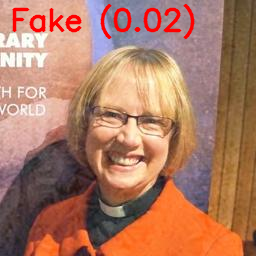

Labeled image saved to: output/real_1.jpg


In [36]:
import tensorflow as tf
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow  # ✅ Import Colab-specific display

# Load model
model = tf.keras.models.load_model("deepfake_detection_model.h5")

# Image settings
img_size = (128, 128)

def classify_and_label_image(image_path, threshold=0.5):
    print(f"\nReading image: {image_path}")
    original_img = cv2.imread(image_path)
    if original_img is None:
        raise ValueError(f"Could not load image at {image_path}")

    # Preprocess for prediction
    img_resized = cv2.resize(original_img, img_size)
    img_input = img_resized.astype(np.float32) / 255.0
    img_input = np.expand_dims(img_input, axis=0)

    # Predict
    prediction = model.predict(img_input)
    score = prediction[0][0]
    label = "Real" if score >= threshold else "Fake"
    print(f"Prediction score: {score:.4f} → {label}")

    # Draw label on original image
    display_img = original_img.copy()
    font = cv2.FONT_HERSHEY_SIMPLEX
    color = (0, 255, 0) if label == "Real" else (0, 0, 255)
    label_text = f"{label} ({score:.2f})"
    cv2.putText(display_img, label_text, (10, 30), font, 1, color, 2, cv2.LINE_AA)

    # ✅ Show image in Colab
    cv2_imshow(display_img)

    # Optionally save the labeled image
    output_path = os.path.join("output", os.path.basename(image_path))
    os.makedirs("output", exist_ok=True)
    cv2.imwrite(output_path, display_img)
    print(f"Labeled image saved to: {output_path}")

# Test images
test_images = [
    "Dataset/real/real_1.jpg",
    "Dataset/fake/fake_0.jpg"
]

for img in test_images:
    try:
        classify_and_label_image(img)
    except ValueError as e:
        print(e)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7130 - loss: 0.6329 - val_accuracy: 0.7720 - val_loss: 0.5555
Epoch 2/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7753 - loss: 0.5539 - val_accuracy: 0.7720 - val_loss: 0.5369
Epoch 3/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.7517 - loss: 0.5604 - val_accuracy: 0.7720 - val_loss: 0.5132
Epoch 4/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7632 - loss: 0.5311 - val_accuracy: 0.7720 - val_loss: 0.5055
Epoch 5/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.7751 - loss: 0.4803 - val_accuracy: 0.7694 - val_loss: 0.5205
Epoch 6/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7933 - loss: 0.4768 - val_accuracy: 0.7694 - val_loss: 0.5195
Epoch 7/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7740 - loss: 0.4794 - val_accuracy: 0.7824 - val_loss: 0.5072
Epoch 8/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.7705 - loss: 0.4525 - val_accuracy: 0.7746 - val_loss:

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 348ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       298
           1       0.47      0.32      0.38        88

    accuracy                           0.76       386
   macro avg       0.65      0.61      0.62       386
weighted avg       0.74      0.76      0.75       386


Confusion Matrix:
[[267  31]
 [ 60  28]]


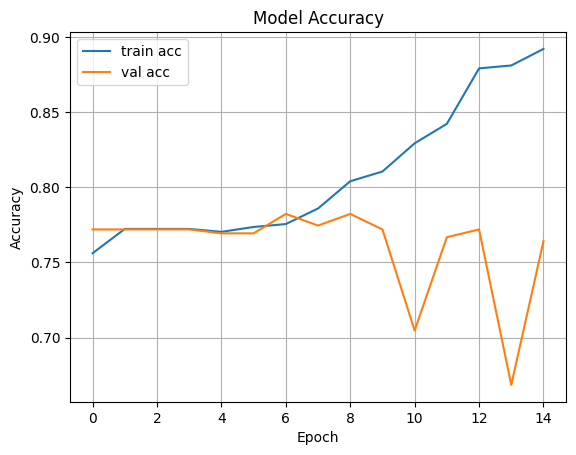

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Dataset paths
real_images_path = "Dataset/real"
fake_images_path = "Dataset/fake"
img_size = (128, 128)

def load_images_from_folder(folder, label):
    images, labels = [], []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Ensure RGB
            images.append(img)
            labels.append(label)
        else:
            print(f"Warning: Could not read {img_path}")
    return images, labels

# Load real and fake images
real_images, real_labels = load_images_from_folder(real_images_path, 0)  # Real = 0
fake_images, fake_labels = load_images_from_folder(fake_images_path, 1)  # Fake = 1

if not real_images or not fake_images:
    raise ValueError("Dataset is empty or incorrectly loaded.")

# Combine and shuffle data
X = np.array(real_images + fake_images, dtype=np.float32) / 255.0
Y = np.array(real_labels + fake_labels)

# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_data=(X_test, Y_test))

# Save
model.save("deepfake_detection_model.h5")

# Evaluate
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(Y_test, predicted_labels))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, predicted_labels))

# Optional: Plot training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



Reading image: Dataset/fake/fake_14.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Prediction score: 0.6791 → Predicted as: Fake


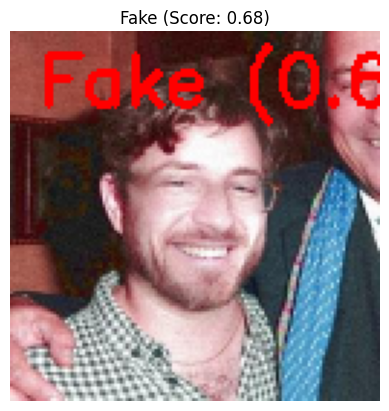


Reading image: Dataset/real/real_101.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Prediction score: 0.2599 → Predicted as: Real


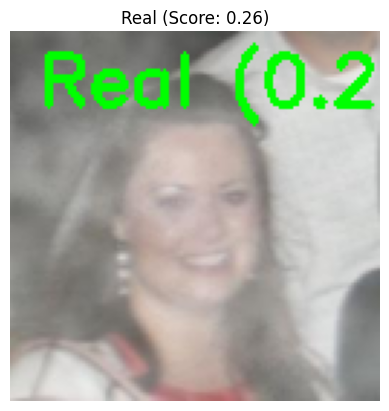


Reading image: Dataset/fake/fake_5490.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Prediction score: 0.9298 → Predicted as: Fake


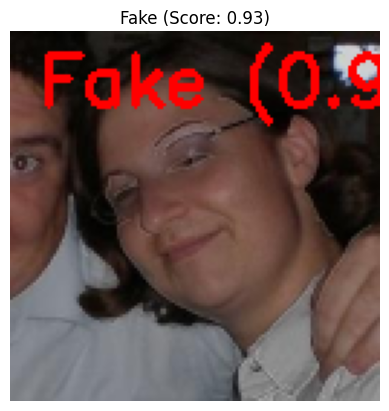

In [50]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Load trained model
model = tf.keras.models.load_model("deepfake_detection_model.h5")

# Image size used during training
img_size = (128, 128)

def classify_and_show_image(image_path, threshold=0.5):
    print(f"\nReading image: {image_path}")

    img = cv2.imread(image_path)
    if img is None:
        print(f"Could not load image {image_path}")
        return

    img_resized = cv2.resize(img, img_size)
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    input_img = img_rgb.astype(np.float32) / 255.0
    input_img = np.expand_dims(input_img, axis=0)

    prediction = model.predict(input_img)
    score = prediction[0][0]

    # Fixing the logic here:
    # - Low score means Real (0)
    # - High score means Fake (1)
    label = "Real" if score < threshold else "Fake"  # This line was fixed
    color = (0, 255, 0) if label == "Real" else (0, 0, 255)

    print(f"Prediction score: {score:.4f} → Predicted as: {label}")

    # Draw label on image
    output_img = cv2.putText(img_resized.copy(), f"{label} ({score:.2f})", (10, 25),
                             cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    # Display using matplotlib (since cv2.imshow won't work in Colab/Jupyter)
    plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
    plt.title(f"{label} (Score: {score:.2f})")
    plt.axis('off')
    plt.show()

# Test images
test_images = [
    "Dataset/fake/fake_14.jpg",
    "Dataset/real/real_101.jpg",  # Real image
    "Dataset/fake/fake_5490.jpg",  # Fake image
]

for img_path in test_images:
    classify_and_show_image(img_path)
